# Maps in shapefile and JSON format

This notebook explores the potential of "shapefile" maps based on the "polygonfile" library

Contents:
1. Basic map information loaded from official sources (e.g. Eurostat) in shapefile format. This procedure may load much more data than is actually needed (e.g. a country may be composed by a number of small shapes that are not relevant for the application; we may be interested in a small number of coutntries...)

2. A basic code to plot a map controlling border and fill color (from SHAPEFILE)

3. Filter the dataset (e.g. only some selected countries) and save in JSON format for further use 

4. An efficient function to plot a map controlling border and fill color  (from JSON)

 



some relevant links

https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0 

https://gisco-services.ec.europa.eu/distribution/v2/countries/

https://pypi.org/project/pyshp/

https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
%matplotlib inline

# load data from shapefile .shp

In [98]:
import shapefile as shp

#shp_path = r"./maps/EU_SHP/CNTR_RG_20M_2020_3035.shp" 
shp_path = r"./maps/SHP1/NUTS_RG_20M_2021_4326.shp"
sf = shp.Reader(shp_path)
shapeRecs = sf.shapeRecords()
df_shapes = pd.DataFrame(columns = ['country_code', 'polygon'])


# basic code for plotting maps from SHAPEFILE data

an example of border and colorfill
NOTE: a country may be composed of one or MORE shapes

adding to df_shapes 0
adding to df_shapes 1
adding to df_shapes 2
adding to df_shapes 3
adding to df_shapes 4
adding to df_shapes 5
adding to df_shapes 6
adding to df_shapes 7
adding to df_shapes 8
adding to df_shapes 9
adding to df_shapes 10
adding to df_shapes 11
adding to df_shapes 12
adding to df_shapes 13
adding to df_shapes 14
adding to df_shapes 15


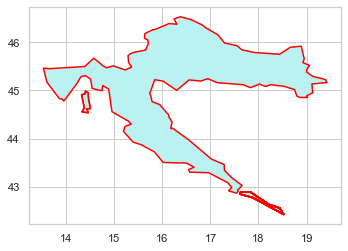

In [99]:
country_id = 1
fillcolor = "c"
bordercolor = "red"
df_shapes = pd.DataFrame(columns = ['country_code', 'polygon'])

n_shapes = len(shapeRecs)
country_shape = shapeRecs[country_id].shape
idx = []
idx = country_shape.parts
n_parts = len(idx)
n_points = len(country_shape.points)
idx.append(n_points)

plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
for i in range(n_parts): #a country may be composed of several shapes
    p0 = idx[i]
    p1 = idx[i+1]
    if (p1-p0)>10:  #avoid small shapes
        shape_ex = sf.shape(country_id)
        seg=shape_ex.points[p0:p1]
        x_lon = np.zeros((len(seg),1))
        y_lat = np.zeros((len(seg),1))
        nn = len(seg) if i < n_parts else 0
        for ip in range(nn):
            x_lon[ip] = seg[ip][0]
            y_lat[ip] = seg[ip][1]
    plt.plot(x_lon,y_lat, c = bordercolor) 
    plt.fill(x_lon,y_lat, fillcolor)
    
    print("adding to df_shapes", i)
    tmp= [(x_lon[i][0], y_lat[i][0]) for i in range(0, len(x_lon))]
    new_row = {'country_code': 'IT', 'polygon': tmp}
    df_shapes = df_shapes.append(new_row, ignore_index = True)

# Plot countries using ISO CODES as country names

In [107]:
data = pd.read_excel("./maps/EU_ISO_CODES.xlsx",sheet_name ="data",   usecols = "A:B")
xmin = min(data.x)
xmax = max(data.x)
xnorm = (data.x-xmin)/(xmax-xmin)

In [112]:
shapeRecs[0].record[0]

'FR\x00\x00\x00'

<function matplotlib.pyplot.show(close=None, block=None)>

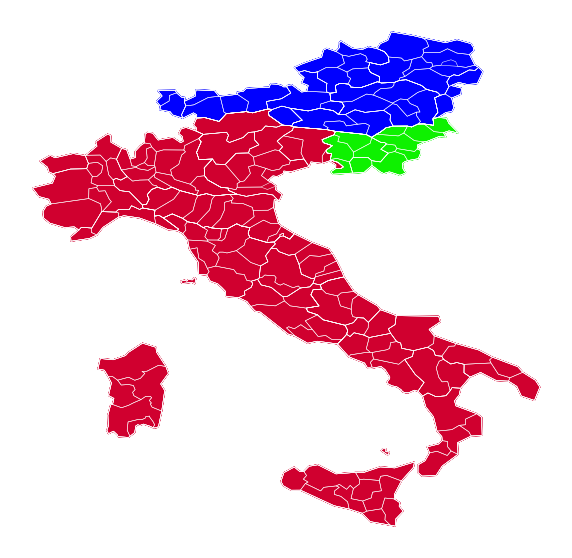

In [118]:

n_shapes = len(shapeRecs)
eunames = ['AL','AT','BE','BG','HR','CH','CY','CZ','DK','EE','FI','FR','DE','GR','HU','IE','IT','LV','LT','LU','MT','NL','NO','PL','RO','SK','SI','ES','SE', 'GB']
eunames = ['AT','IT','SI']
#eunames = ['IT', 'FR', 'ES']

fillcolor = "blue"
bordercolor = "white"

#x = data
cmap = plt.get_cmap('brg')
# colors = cmap(xnorm)
#limits
x_min, x_max = 0, 1e99 # trim east and wes coordinates

plt.figure(figsize = (10,10))
ax.set_aspect('equal')
df_shapes = pd.DataFrame(columns = ['country_code', 'polygon'])

for sh_id in range(n_shapes):
    country_code = shapeRecs[sh_id].record[0][:2]
    if country_code in eunames:
        val = min(data[ data['ISO2'] == country_code ].x)
        country_shape = shapeRecs[sh_id].shape
        idx = []
        idx = country_shape.parts
        n_parts = len(idx)
        n_points = len(country_shape.points)
        idx.append(n_points)

        for i in range(n_parts): #a country may be composed of several shapes
            #print(i)
            p0 = idx[i]
            p1 = idx[i+1]
            if (p1-p0)>6:  #avoid small shapes
                shape_ex = sf.shape(sh_id)
                seg=shape_ex.points[p0:p1]
                x_lon = np.zeros((len(seg),1))
                y_lat = np.zeros((len(seg),1))
                nn = len(seg) if i < n_parts else 0
                for ip in range(nn):
                    x_lon[ip] = seg[ip][0]
                    y_lat[ip] = seg[ip][1]
                

                if (min(x_lon[0]) > x_min) & (max(x_lon[0]) < x_max):
                    fillcolor = (val-xmin)/(xmax-xmin)
                    plt.plot(x_lon,y_lat, c = bordercolor, linewidth =.5, alpha = 1) 
                    plt.fill(x_lon,y_lat, color = cmap(fillcolor), alpha = 1)
                    
                    #print("adding to df_shapes", i)
                    tmp= [(x_lon[i][0], y_lat[i][0]) for i in range(0, len(x_lon))]
                    new_row = {'country_code': country_code, 'polygon': tmp}
                    df_shapes = df_shapes.append(new_row, ignore_index = True)
                    
                    
plt.grid(False)
plt.axis('off')
plt.show



export shapes to a JSON file 

In [119]:
df_shapes.to_json('./maps/selected_countries.json', orient="records")

In [120]:
print("Number of countries")
print(len(set(df_shapes.country_code)))
print("Number of shapes")
print(df_shapes.shape)

Number of countries
3
Number of shapes
(208, 2)


# optional: from SHP to DATAFRAME


In [104]:
# def read_shapefile(sf):
#     """
#     Read a shapefile into a Pandas dataframe 
#     with a 'coords' column holding the geometry information 
#         (1 country per row)
#         (1 or more polygons per row)
#     This uses the pyshp package
#     """
#     fields = [x[0] for x in sf.fields][1:]
#     records = sf.records()
#     shps = [s.points for s in sf.shapes()]
#     df = pd.DataFrame(columns=fields, data=records)
#     df = df.assign(coords=shps)
    
#     #remove unwanted characters in column names
#     cols =  [ 'CNTR_NAME', 'NAME_ENGL', 'ISO3_CODE', 'FID']
#     for col in cols:
#         df[col] = df[col].apply(lambda x: x.replace("\x00", ""))
        
#     return df



In [105]:
# selected_countries = ['ITA','FRA','AUT']
# df_coords = read_shapefile(sf)
# df_coords = df_coords[df_coords['ISO3_CODE'].isin(selected_countries)  ]
# df_coords.head(3)

# Read data from JSON to a dataframe


In [122]:
polygons = pd.read_json('./maps/selected_countries.json', orient="records")
n_polys = polygons.shape[0]
n_countries = set(polygons.country_code)
polygons.head(6)

,country_code,polygon
0,AT,"[[15.75363, 48.85218], [16.29009, 48.73395], [..."
1,SI,"[[16.37079, 46.72224], [16.59681, 46.4759], [1..."
2,AT,"[[15.75363, 48.85218], [16.29009, 48.73395], [..."
3,AT,"[[15.84791, 47.56847], [16.09602, 47.4985], [1..."
4,AT,"[[14.69101, 48.5843], [14.864370000000001, 48...."
5,IT,"[[12.47792, 46.67984], [12.69064, 46.65697], [..."


# Plot country shapes (data from JSON file)

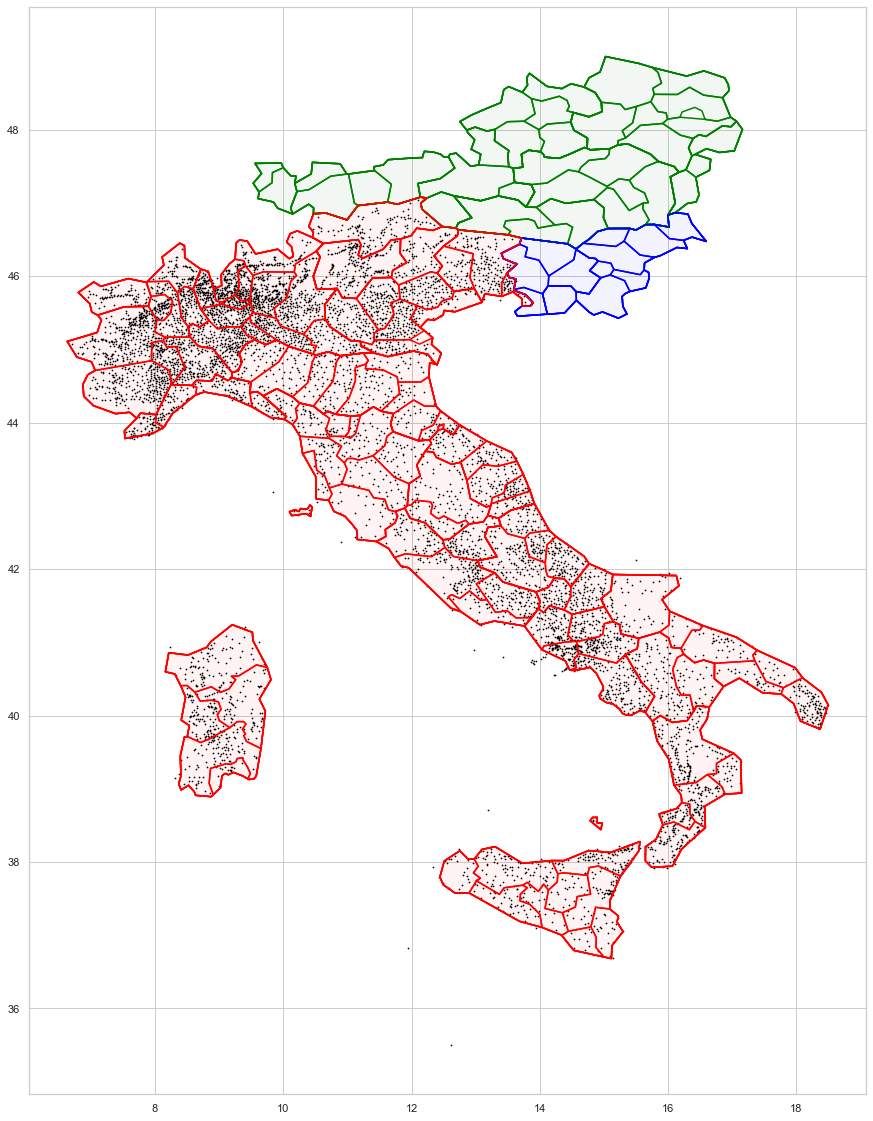

In [127]:
plt.figure(figsize = (15,20))

selected_countries = ["IT", "AT","SI", "FR"]
polygons = pd.read_json('./maps/selected_countries.json', orient="records")

poly_to_polt = polygons[ polygons['country_code'].isin(selected_countries)]

colors = {
    "IT":"red",
    "AT":"green",
    "SI":"blue" ,
    "FR":"yellow"   
}


for _, row in poly_to_polt.iterrows():
    country = row.country_code
    poly = row.polygon
    coords = list(zip(*poly))
    plt.plot(coords[0],coords[1], c=colors.get(country))
    plt.fill(coords[0],coords[1], c=colors.get(country), alpha=.01)
    

points = pd.read_csv('./data/comuni_lat_long.csv', sep=";")
x = points.lng
y = points.lat
plt.scatter(x=x, y=y,s=2, c="black", marker=".")
    
plt.show()